In [1]:
from itertools import product
from graphviz import Digraph

class DirectedGraph():
    def __init__(self, vertices, edges, engine='dot'):
        self.edges = set(edges)
        self.vertices = set(vertices)
        self.engine = engine
        if not self.__edges_nodes__() <= self.vertices :
            raise ValueError('Edges contain element outside of vertices set')

    def __mul__(self, other):
        def vertices():
            return set(product(iter(self.vertices), iter(other.vertices)))

        def edges():
            return {((pair[0][0], pair[1][0]), (pair[0][1], pair[1][1])) for pair in product(self.edges, other.edges)}

        return DirectedGraph(vertices(), edges())

    def to_dot(self):
        dot = Digraph(engine=self.engine)
        for node in iter(self.vertices):
            dot.node(str(node), str(node), shape='point')
        for edge in iter(self.edges):
            dot.edge(str(edge[0]), str(edge[1]), arrowsize='0.5', arrowhead='ovee')
        return dot

    def __edges_nodes__(self):
        return set([node for pair in list(map(lambda edge: list(edge), self.edges)) for node in pair])

    def _repr_svg_(self):
        return self.to_dot()._repr_svg_()
dg = DirectedGraph

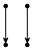

In [3]:
dg({0,1}, {(0,0),(1,1)}) * dg({0,1}, {(0,1)})